                         Date  Event ID          Event Type  \
0  2023-10-02 17:15:25.954539  EVT00001     Physical*Damage   
1  2023-04-28 17:15:25.954539  EVT00002  Transaction-Fraud!   
2  2024-02-21 17:15:25.954539  EVT00003         Data&Breach   
3  2022-12-28 17:15:25.954539  EVT00004     Security#Breach   
4  2024-03-08 17:15:25.954539  EVT00005       Payment@Error   

        Business Line                                  Event Description  \
0      Private@Equity  Physical*Damage event in Private@Equity. Issue...   
1   Wealth*Management  Transaction-Fraud! event in Wealth*Management....   
2   Wealth*Management  Data&Breach event in Wealth*Management. Issue ...   
3          Insurance&  Security#Breach event in Insurance&. Issue res...   
4  Investment$Banking  Payment@Error event in Investment$Banking. Iss...   

   Net Loss Amount  
0        -37992.05  
1         49697.06  
2         21646.99  
3         49328.94  
4         49725.69  

Severity Statistics by Event Type:
  

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_30124\1490750168.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_stats['99% VaR'] = df.groupby("Event Type").apply(calculate_var)


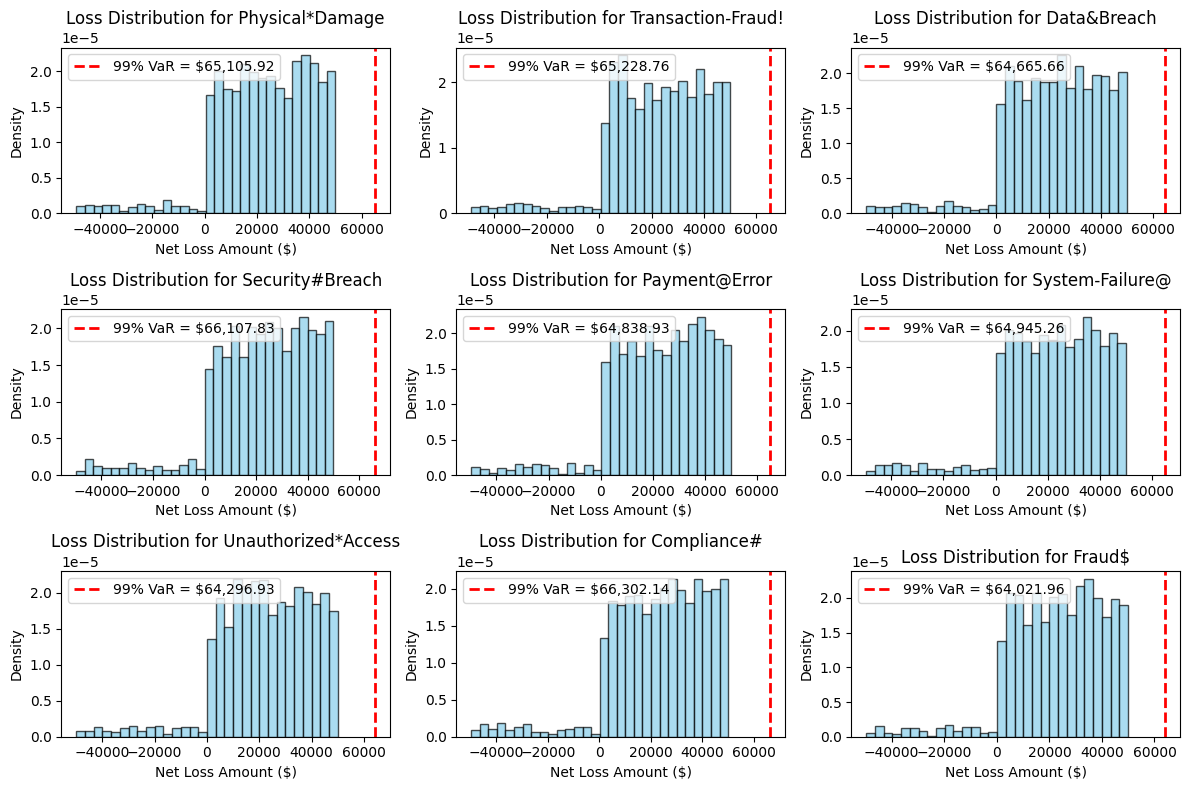

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
df = pd.read_csv("operational_risk_dataset_expanded.csv")

# Check the first few rows of the dataset
print(df.head())

# Step 1: Group by Event Type and Calculate Severity Statistics
severity_stats = df.groupby("Event Type")["Net Loss Amount"].agg(['mean', 'var', 'count'])
severity_stats.columns = ['Mean Loss', 'Variance', 'Count']
print("\nSeverity Statistics by Event Type:")
print(severity_stats)

# Step 2: Calculate 99% Value-at-Risk (VaR) for Each Event Type
confidence_level = 0.99
z_99 = stats.norm.ppf(confidence_level)  # z-score for 99% confidence

# Function to calculate VaR for each group
def calculate_var(group):
    mean = group["Net Loss Amount"].mean()
    std_dev = group["Net Loss Amount"].std()
    VaR = mean + z_99 * std_dev  # VaR calculation for normal approximation
    return VaR

# Apply the function to each event type
severity_stats['99% VaR'] = df.groupby("Event Type").apply(calculate_var)
print("\n99% Value-at-Risk (VaR) by Event Type:")
print(severity_stats[['Mean Loss', '99% VaR']])

# Step 3: Visualize Loss Distributions and VaR for Each Event Type
plt.figure(figsize=(12, 8))

# Loop through each event type and plot the distribution
for i, event_type in enumerate(df["Event Type"].unique()):
    plt.subplot(3, 3, i + 1)
    losses = df[df["Event Type"] == event_type]["Net Loss Amount"]
    
    # Plot histogram of losses
    plt.hist(losses, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    
    # Plot VaR line
    VaR = severity_stats.loc[event_type, '99% VaR']
    plt.axvline(VaR, color='red', linestyle='--', linewidth=2, label=f'99% VaR = ${VaR:,.2f}')
    
    # Labeling and title
    plt.title(f"Loss Distribution for {event_type}")
    plt.xlabel("Net Loss Amount ($)")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


In [2]:
df

,Date,Event ID,Event Type,Business Line,Event Description,Net Loss Amount
0,2023-10-02 17:15:25.954539,EVT00001,Physical*Damage,Private@Equity,Physical*Damage event in Private@Equity. Issue...,-37992.05
1,2023-04-28 17:15:25.954539,EVT00002,Transaction-Fraud!,Wealth*Management,Transaction-Fraud! event in Wealth*Management....,49697.06
2,2024-02-21 17:15:25.954539,EVT00003,Data&Breach,Wealth*Management,Data&Breach event in Wealth*Management. Issue ...,21646.99
3,2022-12-28 17:15:25.954539,EVT00004,Security#Breach,Insurance&,Security#Breach event in Insurance&. Issue res...,49328.94
4,2024-03-08 17:15:25.954539,EVT00005,Payment@Error,Investment$Banking,Payment@Error event in Investment$Banking. Iss...,49725.69
...,...,...,...,...,...,...
15995,2021-02-05 17:15:25.954539,EVT15996,System-Failure@,Retail_Banking,System-Failure@ event in Retail_Banking. Issue...,14830.53
15996,2024-09-15 17:15:25.954539,EVT15997,Security#Breach,Retail_Banking,Security#Breach event in Retail_Banking. Issue...,41768.96
15997,2023-05-14 17:15:25.954539,EVT15998,Payment@Error,Insurance&,Payment@Error event in Insurance&. Issue resol...,-22277.73
15998,2024-07-12 17:15:25.954539,EVT15999,System-Failure@,Private@Equity,System-Failure@ event in Private@Equity. Issue...,41840.24


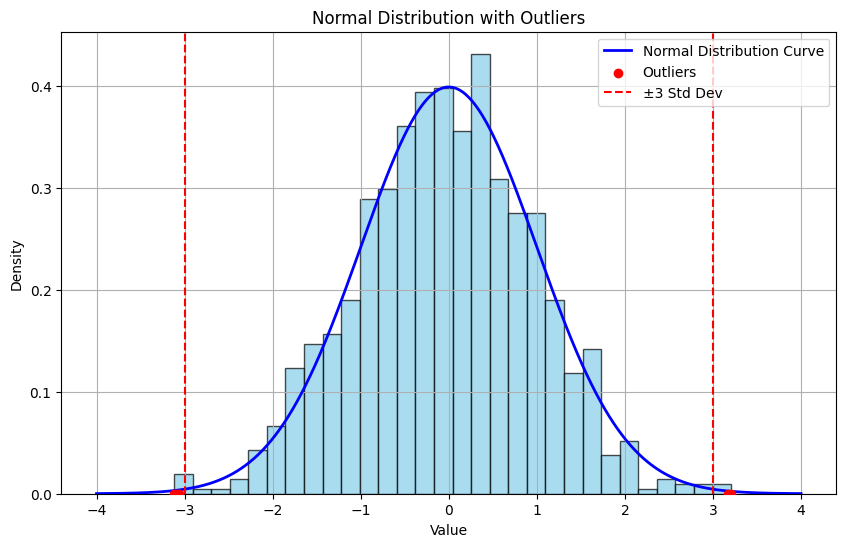

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a normal distribution with a mean of 0 and standard deviation of 1
mean = 0
std_dev = 1
sample_size = 1000
data = np.random.normal(mean, std_dev, sample_size)

# Calculate the threshold for outliers (e.g., 3 standard deviations from the mean)
outlier_threshold = 3 * std_dev

# Identify outliers as points beyond the threshold
outliers = data[np.abs(data - mean) > outlier_threshold]

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)

# Overlay the normal distribution curve
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)
y = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, y, color='blue', linewidth=2, label='Normal Distribution Curve')

# Mark outliers in red
plt.scatter(outliers, np.zeros_like(outliers), color='red', label='Outliers', zorder=5)

# Draw threshold lines for outliers (±3 standard deviations)
plt.axvline(mean + outlier_threshold, color='red', linestyle='--', linewidth=1.5, label='±3 Std Dev')
plt.axvline(mean - outlier_threshold, color='red', linestyle='--', linewidth=1.5)

# Labeling
plt.title("Normal Distribution with Outliers")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


# Explanation of Each Step
# Generate Data:

# We create 1,000 data points from a normal distribution with a mean of 0 and standard deviation of 1.
# Define Outlier Threshold:

# Using 3 standard deviations as the threshold, we identify outliers as data points with values greater than 
# ±
# 3
# ×
# std_dev
# ±3×std_dev.
# Plot Histogram:

# The histogram of the normally distributed data shows the bell curve shape typical of normal distributions.
# Overlay Normal Curve:

# We add a normal distribution curve based on the mean and standard deviation for comparison.
# Mark Outliers:

# Outliers are plotted as red dots on the x-axis. These represent values that lie beyond the ±3 standard deviation threshold.
# Draw Threshold Lines:

# Vertical dashed red lines at 
# ±
# 3
# ±3 standard deviations help visually define the boundaries for typical data values.
# Interpreting the Plot
# Normal Curve: The bell-shaped curve represents the expected distribution of values in a normal distribution.
# Outliers: Points in red are outliers, lying beyond ±3 standard deviations. These are relatively rare events in a normal distribution and represent about 0.3% of the data if the data perfectly follows a normal distribution.
# Threshold Lines: The lines at ±3 standard deviations show the bounds for typical values, with anything beyond considered unusual or an outlier.
# This visualization helps identify extreme values, highlighting how far they deviate from the mean in a normal distribution. Let me know if you’d like further details on this!

Outliers:
       Event ID           Event Type  Net Loss Amount
0      EVT00001      Physical*Damage        -37992.05
35     EVT00036               Fraud$        -35668.95
45     EVT00046               Fraud$        -36042.85
95     EVT00096      Security#Breach        -31851.30
101    EVT00102      Security#Breach        -37858.29
...         ...                  ...              ...
15755  EVT15756  Unauthorized*Access        -34652.46
15797  EVT15798          Compliance#        -45184.12
15815  EVT15816      Physical*Damage        -41829.62
15835  EVT15836        Payment@Error        -48792.33
15887  EVT15888          Compliance#        -37286.68

[312 rows x 3 columns]


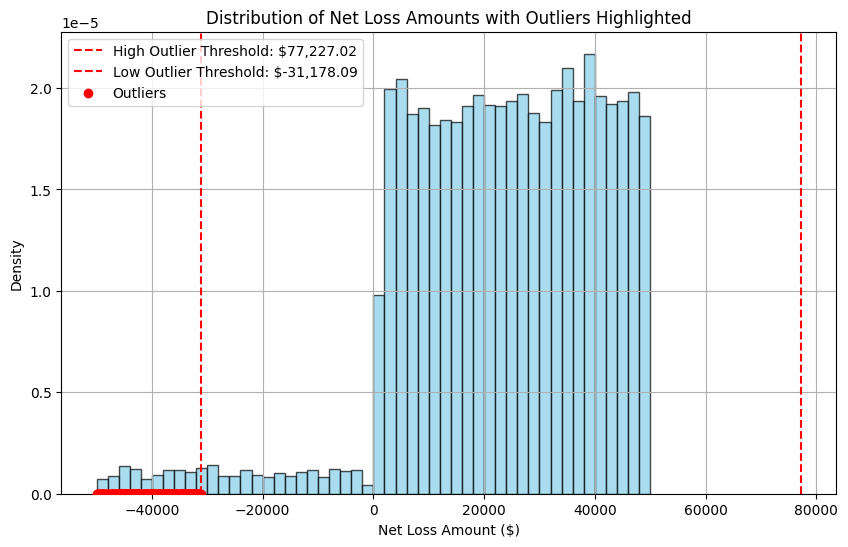

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("operational_risk_dataset_expanded.csv")

# Step 1: Calculate the mean and standard deviation of "Net Loss Amount"
mean_loss = df["Net Loss Amount"].mean()
std_dev_loss = df["Net Loss Amount"].std()

# Step 2: Define the threshold for outliers (3 standard deviations from the mean)
outlier_threshold_high = mean_loss + 3 * std_dev_loss
outlier_threshold_low = mean_loss - 3 * std_dev_loss

# Step 3: Identify outliers
outliers = df[(df["Net Loss Amount"] > outlier_threshold_high) | (df["Net Loss Amount"] < outlier_threshold_low)]

print(f"Outliers:\n{outliers[['Event ID', 'Event Type', 'Net Loss Amount']]}")

# Step 4: Plot the distribution and highlight outliers
plt.figure(figsize=(10, 6))
plt.hist(df["Net Loss Amount"], bins=50, color='skyblue', edgecolor='black', alpha=0.7, density=True)

# Overlay threshold lines for outliers
plt.axvline(outlier_threshold_high, color='red', linestyle='--', linewidth=1.5, label=f'High Outlier Threshold: ${outlier_threshold_high:,.2f}')
plt.axvline(outlier_threshold_low, color='red', linestyle='--', linewidth=1.5, label=f'Low Outlier Threshold: ${outlier_threshold_low:,.2f}')

# Plot the outliers
plt.scatter(outliers["Net Loss Amount"], np.zeros_like(outliers["Net Loss Amount"]), color='red', label='Outliers', zorder=5)

# Labeling
plt.title("Distribution of Net Loss Amounts with Outliers Highlighted")
plt.xlabel("Net Loss Amount ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("operational_risk_dataset_expanded.csv")

# Step 1: Calculate mean and standard deviation of "Net Loss Amount"
mean_loss = df["Net Loss Amount"].mean()
std_dev_loss = df["Net Loss Amount"].std()

# Step 2: Define outlier thresholds (3 standard deviations from the mean)
outlier_threshold_high = mean_loss + 3 * std_dev_loss
outlier_threshold_low = mean_loss - 3 * std_dev_loss

# Step 3: Cap the outliers
df["Net Loss Amount"] = np.where(df["Net Loss Amount"] > outlier_threshold_high, outlier_threshold_high, df["Net Loss Amount"])
df["Net Loss Amount"] = np.where(df["Net Loss Amount"] < outlier_threshold_low, outlier_threshold_low, df["Net Loss Amount"])

# Display the capped data
print(df.head())
print(f"\nHigh Outlier Threshold: ${outlier_threshold_high:,.2f}")
print(f"Low Outlier Threshold: ${outlier_threshold_low:,.2f}")


                         Date  Event ID          Event Type  \
0  2023-10-02 17:15:25.954539  EVT00001     Physical*Damage   
1  2023-04-28 17:15:25.954539  EVT00002  Transaction-Fraud!   
2  2024-02-21 17:15:25.954539  EVT00003         Data&Breach   
3  2022-12-28 17:15:25.954539  EVT00004     Security#Breach   
4  2024-03-08 17:15:25.954539  EVT00005       Payment@Error   

        Business Line                                  Event Description  \
0      Private@Equity  Physical*Damage event in Private@Equity. Issue...   
1   Wealth*Management  Transaction-Fraud! event in Wealth*Management....   
2   Wealth*Management  Data&Breach event in Wealth*Management. Issue ...   
3          Insurance&  Security#Breach event in Insurance&. Issue res...   
4  Investment$Banking  Payment@Error event in Investment$Banking. Iss...   

   Net Loss Amount  
0    -31178.093917  
1     49697.060000  
2     21646.990000  
3     49328.940000  
4     49725.690000  

High Outlier Threshold: $77,227.02
Lo

In [6]:
# Verify that no values exceed the thresholds
print("Maximum value after capping:", df["Net Loss Amount"].max())
print("Minimum value after capping:", df["Net Loss Amount"].min())


Maximum value after capping: 49999.35
Minimum value after capping: -31178.093917320464


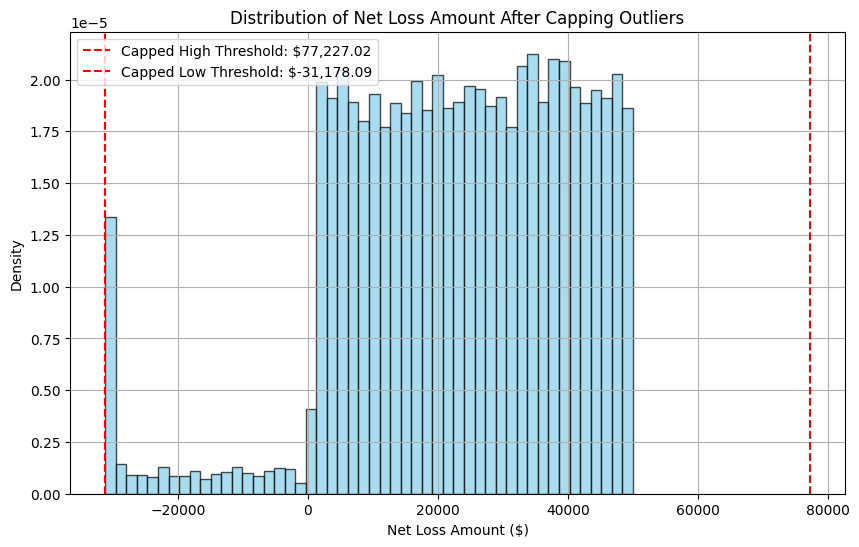

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution of "Net Loss Amount" after capping
plt.figure(figsize=(10, 6))
plt.hist(df["Net Loss Amount"], bins=50, color='skyblue', edgecolor='black', alpha=0.7, density=True)

# Overlay capped threshold lines
plt.axvline(outlier_threshold_high, color='red', linestyle='--', linewidth=1.5, label=f'Capped High Threshold: ${outlier_threshold_high:,.2f}')
plt.axvline(outlier_threshold_low, color='red', linestyle='--', linewidth=1.5, label=f'Capped Low Threshold: ${outlier_threshold_low:,.2f}')

# Labeling
plt.title("Distribution of Net Loss Amount After Capping Outliers")
plt.xlabel("Net Loss Amount ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


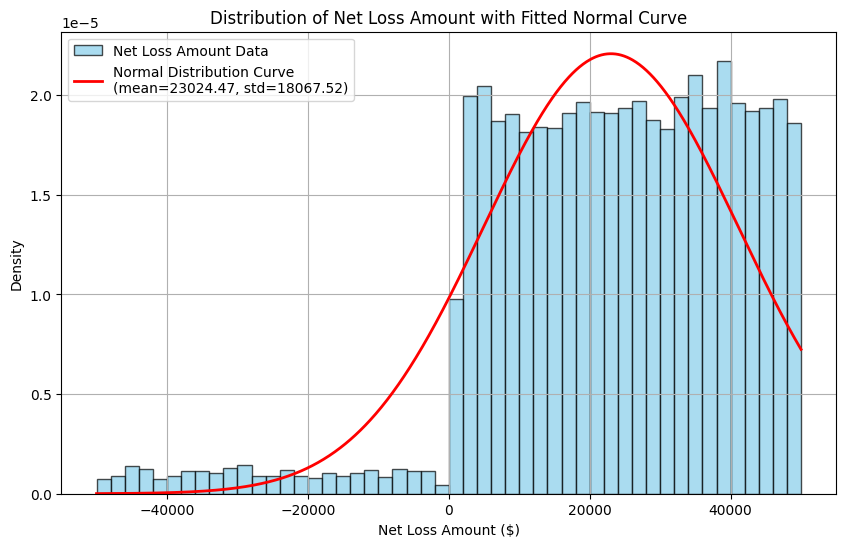

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the dataset (assuming the outliers have already been capped as shown previously)
df = pd.read_csv("operational_risk_dataset_expanded.csv")

# Step 1: Calculate the mean and standard deviation of "Net Loss Amount"
mean_loss = df["Net Loss Amount"].mean()
std_dev_loss = df["Net Loss Amount"].std()

# Step 2: Plot the histogram of "Net Loss Amount" with density normalization
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df["Net Loss Amount"], bins=50, color='skyblue', edgecolor='black', alpha=0.7, density=True, label="Net Loss Amount Data")

# Step 3: Plot the normal distribution curve
x = np.linspace(min(df["Net Loss Amount"]), max(df["Net Loss Amount"]), 1000)
normal_curve = norm.pdf(x, mean_loss, std_dev_loss)  # Normal distribution curve with calculated mean and std deviation
plt.plot(x, normal_curve, color='red', linewidth=2, label=f'Normal Distribution Curve\n(mean={mean_loss:.2f}, std={std_dev_loss:.2f})')

# Labeling
plt.title("Distribution of Net Loss Amount with Fitted Normal Curve")
plt.xlabel("Net Loss Amount ($)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
